In [5]:
import numpy as np
import pandas as pd
import xgboost
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.preprocessing import StandardScaler

import time

In [6]:
%matplotlib inline


import seaborn as sns

import matplotlib.pyplot as plt
#!pip install plotly
import plotly
import plotly.graph_objs as go

from matplotlib.colors import ListedColormap

## How big dataset?

In [7]:
nSamples = int(2e5)

def dataset_3 ( nSamples ):    
    X, y = make_classification(n_samples = nSamples,n_classes = 2,
                               n_features=2, n_redundant=0, n_informative=2,
                               random_state=1, n_clusters_per_class=1)
    rng = np.random.RandomState(2)
    X += 2 * rng.uniform(size=X.shape)
    return (X, y)
    

noiseFactor = 1.5
datasets = [dataset_3(nSamples),
            make_moons(n_samples = nSamples, noise=0.2*noiseFactor, random_state=1),
            make_circles(n_samples = nSamples, noise=0.1*noiseFactor, factor=0.75, random_state=1)
            ]
names = ["classification", "moons","circles"]

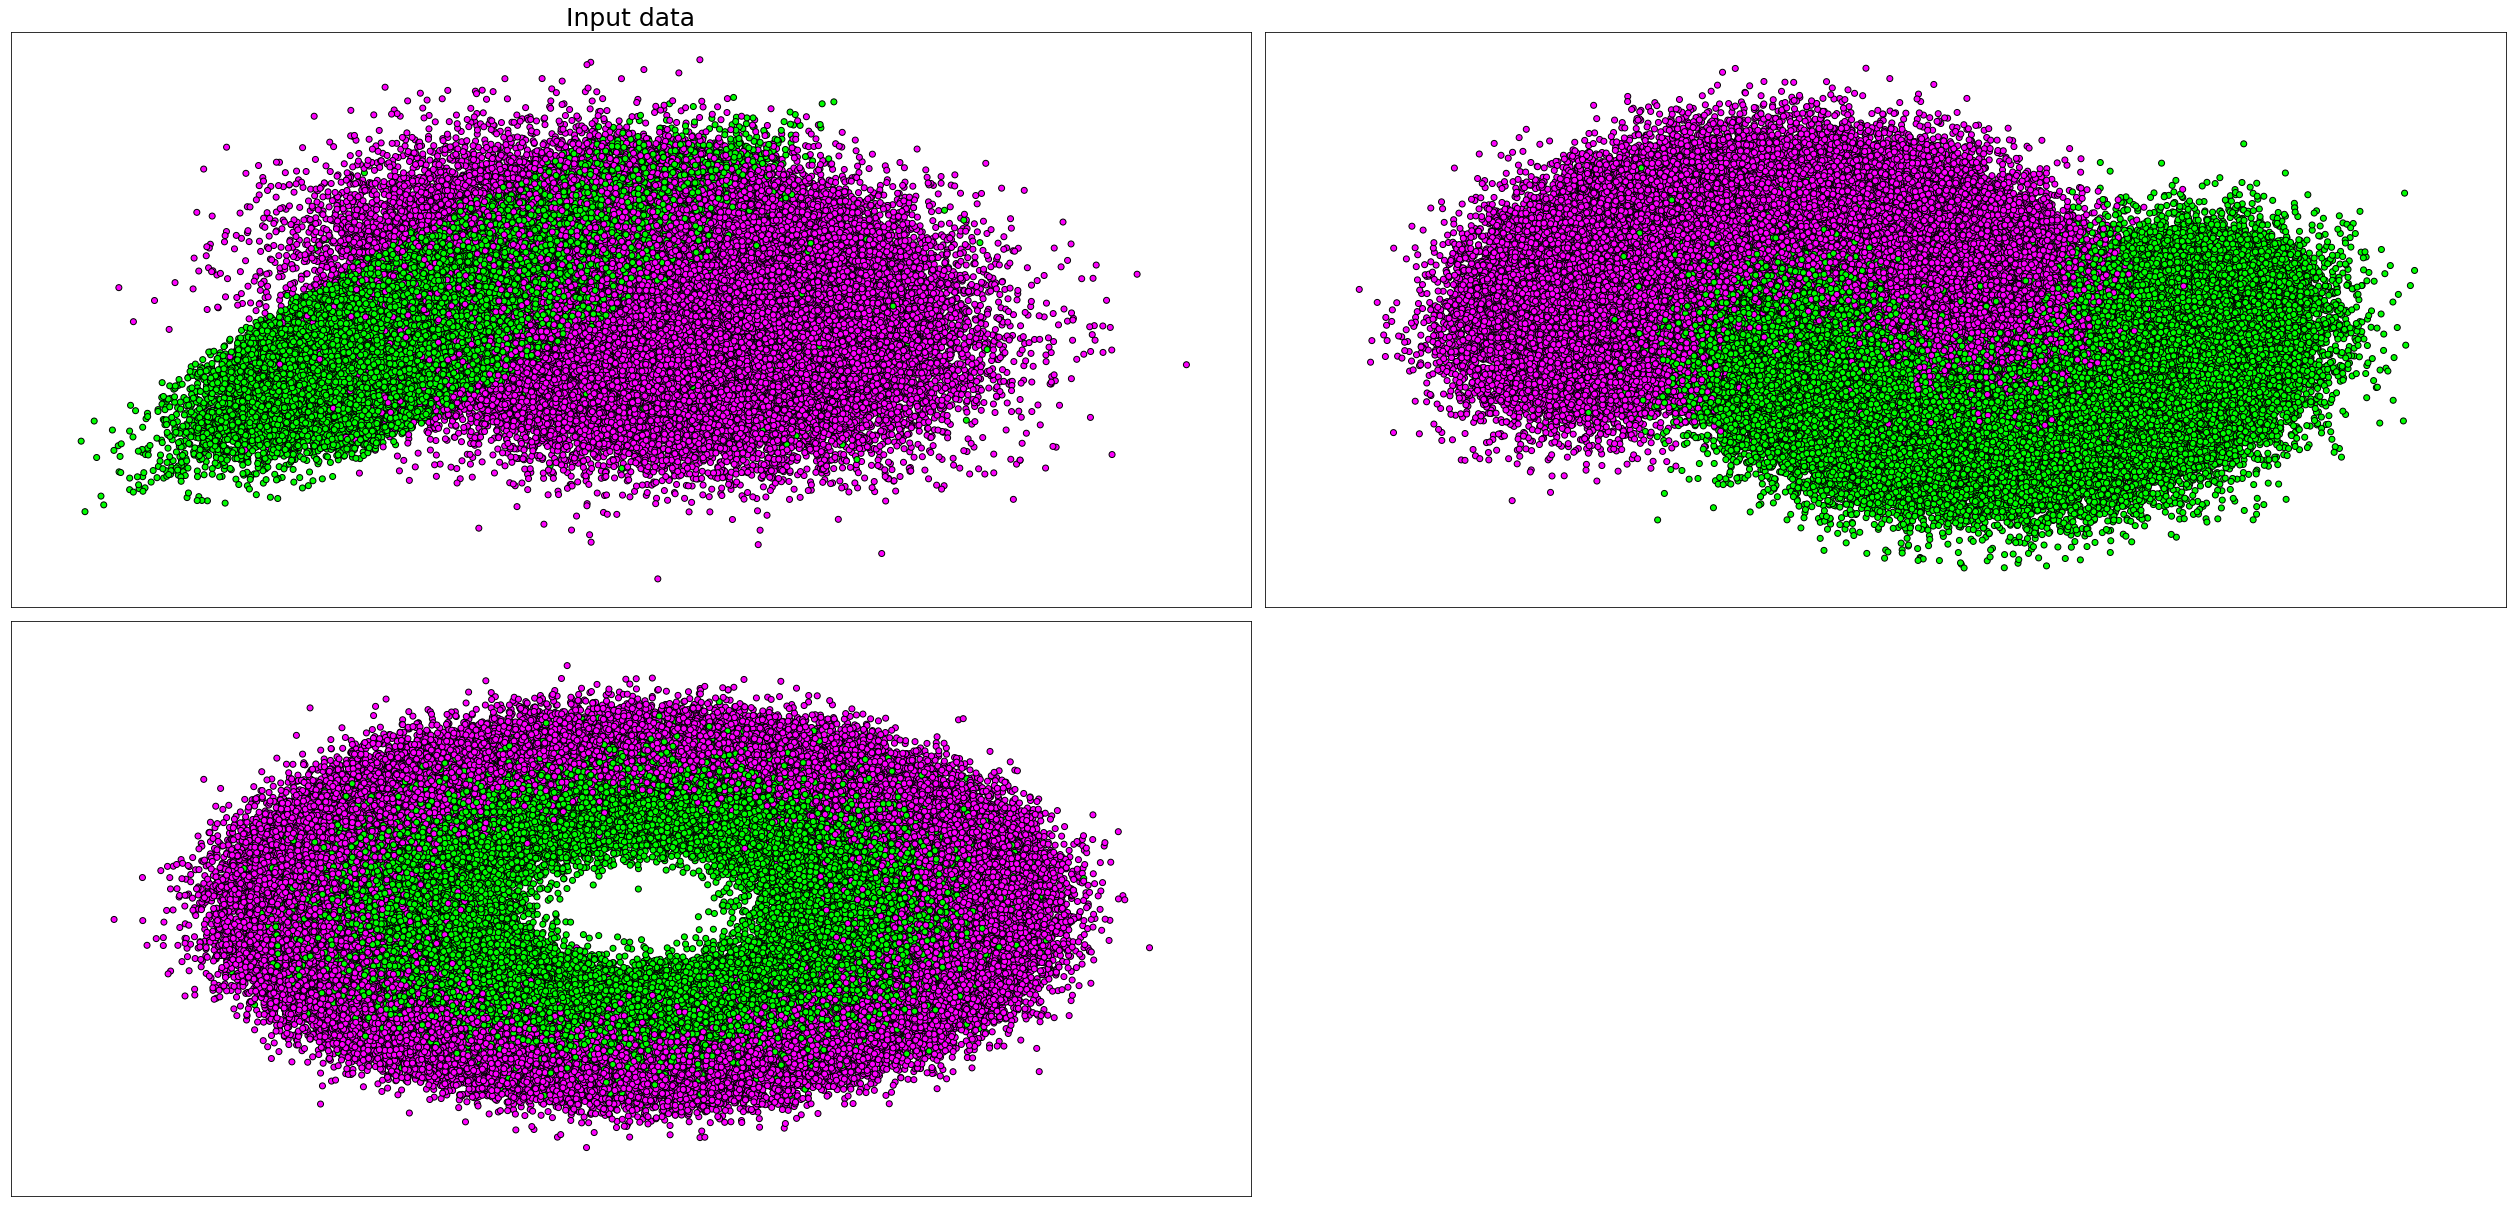

In [8]:
figure = plt.figure(figsize=(35, 25))
h = .05  # step size in the mesh
i = 1


# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
#     X_train, X_test, y_train, y_test = \
#         train_test_split(X, y, test_size=.4, random_state=42)
    
    # define plotting bounds
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # plot the train & test data
    cm = plt.cm.Purples #PRGn#tab20b#spring#cool#PRGn#PiYG#PuOr#RdBu
    cm_bright = ListedColormap(['#FF00FF', '#00FF00'])
    
    ax = plt.subplot(len(datasets),1 + 1, i)
    if ds_cnt == 0: ax.set_title("Input data", size = 25)
    
    # plot training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,edgecolors='k')
    
#     # plot the testing points
#     ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
    
    # apply bounds
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

  
plt.tight_layout()
plt.show()